In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
subway=pd.read_csv('./DATA/001_1.MONTHLY_SUBWAY_INFO.csv')

### 전처리

In [3]:
subway=subway.groupby('date').mean()
subway=subway.drop(['wd','25-on','25_off','26-on','26_off','27-on','27_off'], axis=1)

### 년월 두 번 입력 받아서 두 년월의 시간대별 지하철 승하차 인원수 비교 그래프 출력

#### Input

In [18]:
print('201501~202107사이의 년월 2회 입력')
ym1=int(input('첫번째 년월 YYYYmm:'))
ym2=int(input('두번째 년월 YYYYmm:'))
temp=subway.loc[[ym1,ym2]].transpose()
temp=temp.reset_index()
temp.rename(columns={'index':'time'},inplace=True)
sub=temp[temp['time'].str.contains('on')]
sub['difference']=sub[ym1]-sub[ym2]
sub['time']=sub['time'].str.slice(start=0, stop=2)

201501~202107사이의 년월 2회 입력
첫번째 년월 YYYYmm:202101
두번째 년월 YYYYmm:202102


<ipython-input-18-fe85ab891160>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-fe85ab891160>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Scale

##### MinMaxScaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler_ym1=MinMaxScaler()
sub['Scaled ym1'] = scaler_ym1.fit_transform(sub[[ym1]])

scaler_dif=MinMaxScaler()
sub['Scaled difference'] = scaler_dif.fit_transform(sub[['difference']])

sub['abs_values of Scaled difference-count']=abs(sub['Scaled difference']-sub['Scaled ym1'])

<ipython-input-5-0200ad1b32d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Scaled ym1'] = scaler_ym1.fit_transform(sub[[ym1]])
<ipython-input-5-0200ad1b32d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Scaled difference'] = scaler_dif.fit_transform(sub[['difference']])
<ipython-input-5-0200ad1b32d9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

##### StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler_ym1=StandardScaler()
sub['Scaled ym1'] = scaler_ym1.fit_transform(sub[[ym1]])

scaler_dif=StandardScaler()
sub['Scaled difference'] = scaler_dif.fit_transform(sub[['difference']])

sub['abs_values of Scaled difference-count']=abs(sub['Scaled difference']-sub['Scaled ym1'])

<ipython-input-11-f334916b6f62>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-f334916b6f62>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-f334916b6f62>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Plot

##### matplotlib

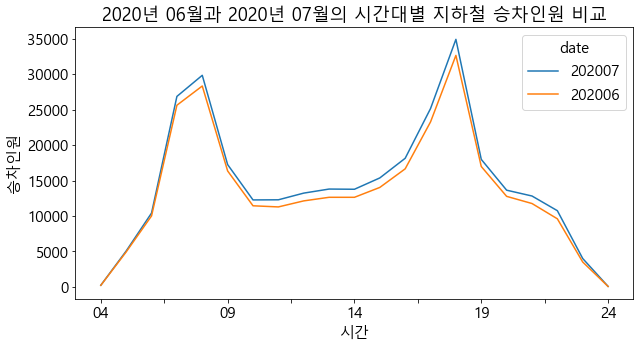

In [23]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 15
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

sub.plot(x='time',y=[ym2,ym1])
plt.title('{0}년 {1}월과 {2}년 {3}월의 시간대별 지하철 승차인원 비교'
          .format(str(ym1)[:4],str(ym1)[4:6],str(ym2)[:4],str(ym2)[4:6]))
plt.xlabel('시간')
plt.ylabel('승차인원')

plt.show()

<AxesSubplot:xlabel='time'>

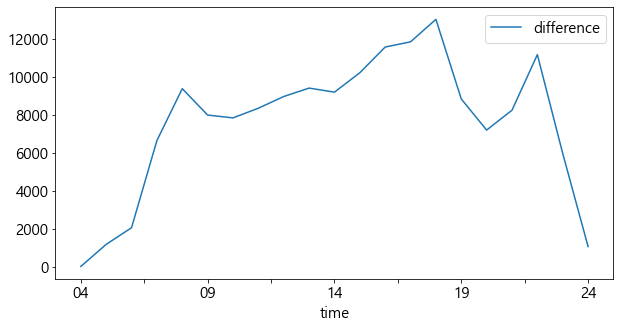

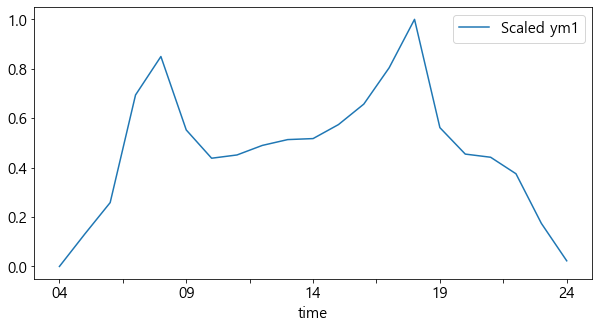

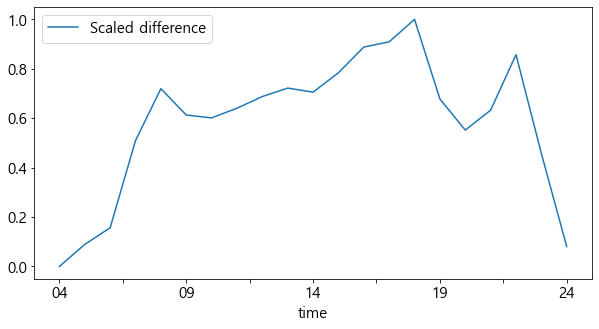

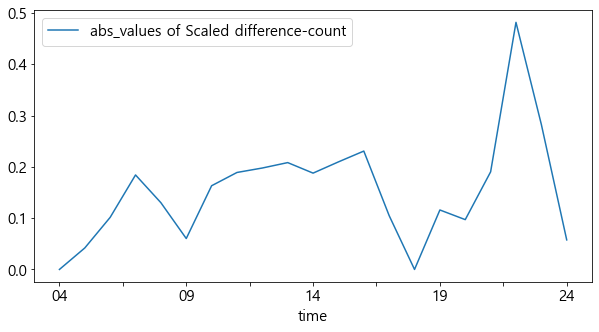

In [91]:
sub.plot(x='time',y='difference')
sub.plot(x='time',y='Scaled ym1')
sub.plot(x='time',y='Scaled difference')
sub.plot(x='time',y='abs_values of Scaled difference-count')

##### plotly

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure()
fig = make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(x=sub['time'], y= sub[ym1], mode='lines',name ='{0}년 {1}월 승차인원'.format(str(ym1)[:4],str(ym1)[4:6]),
                         line=dict(color='royalblue', width=2)), secondary_y=False)
fig.add_trace(go.Scatter(x=sub['time'], y= sub[ym2], mode='lines', name ='{0}년 {1}월 승차인원'.format(str(ym2)[:4],str(ym2)[4:6]),
                         line=dict(color='red', width=2)),secondary_y=False)
fig.add_trace(go.Scatter(x=sub['time'], y= sub['difference'], mode='lines', name ='승차인원 감소',
                         line=dict(color='green', width=2)), secondary_y=True)
fig.update_layout(title='{0}년 {1}월과 {2}년 {3}월의 시간대별 지하철 승차인원 비교'
                  .format(str(ym1)[:4],str(ym1)[4:6],str(ym2)[:4],str(ym2)[4:6]),
                  width=800,
                  height=600,
                  xaxis_title='시간',
                  yaxis_title='승차인원',
                  title_x=0.5,
                  font=dict(
                              family = 'Malgun Gothic',
                              size = 10))

fig.show()

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure()
fig = make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(x=sub['time'], y= sub[ym1], mode='lines',name ='{0}년 {1}월 승차인원'.format(str(ym1)[:4],str(ym1)[4:6]),
                         line=dict(color='royalblue', width=2)), secondary_y=False)
fig.add_trace(go.Scatter(x=sub['time'], y= sub[ym2], mode='lines', name ='{0}년 {1}월 승차인원'.format(str(ym2)[:4],str(ym2)[4:6]),
                         line=dict(color='red', width=2)),secondary_y=False)
fig.add_trace(go.Scatter(x=sub['time'], y= sub['Scaled ym1'], mode='lines',name ='표준화된 {0}년 {1}월 승차인원'.format(str(ym1)[:4],str(ym1)[4:6]),
                         line=dict(color='green', width=2)), secondary_y=True)
fig.add_trace(go.Scatter(x=sub['time'], y= sub['Scaled difference'], mode='lines', name ='표준화된 승차인원 감소',
                         line=dict(color='yellow', width=2)), secondary_y=True)
fig.add_trace(go.Scatter(x=sub['time'], y= sub['abs_values of Scaled difference-count'], mode='lines', name ='표준화된 승차인원와 승차인원 감소의 차이',
                         line=dict(color='orange', width=2)), secondary_y=True)
fig.update_layout(title='{0}년 {1}월과 {2}년 {3}월의 시간대별 지하철 승차인원 비교'
                  .format(str(ym1)[:4],str(ym1)[4:6],str(ym2)[:4],str(ym2)[4:6]),
                  width=800,
                  height=600,
                  xaxis_title='시간',
                  yaxis_title='승차인원',
                  title_x=0.5,
                  font=dict(
                              family = 'Malgun Gothic',
                              size = 10))

fig.show()